In [270]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [271]:
# Устанавливаем доступ к папке с файлами ДР
from google.colab import drive
 
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Colab Notebooks/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [272]:
# Загружаем csv файлы с гугл диска
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [273]:
# Создаем словарь для совместной обработки всех 6и НД
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

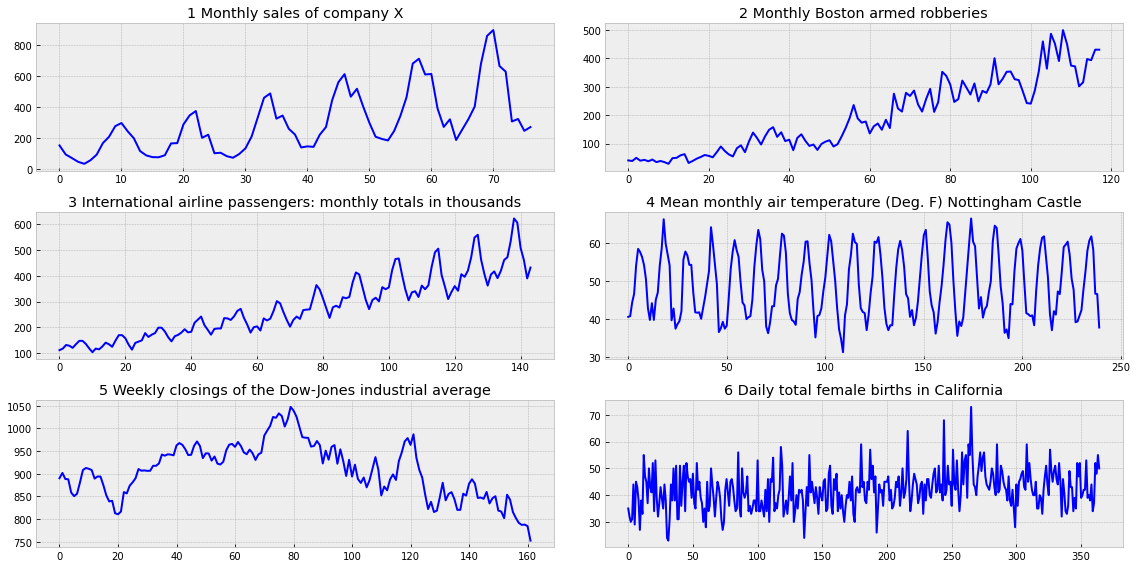

In [274]:
%matplotlib inline
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(str(i+1)+' '+key)
    plt.tight_layout()

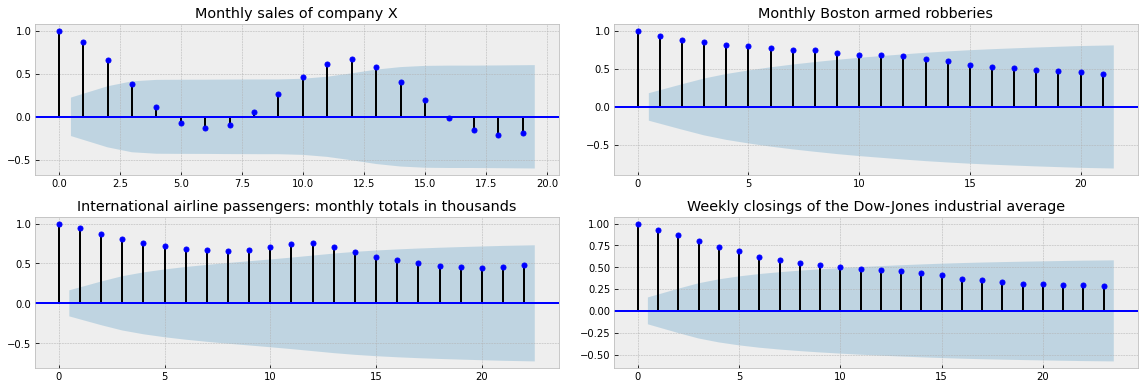

In [269]:
# Посмотрим график автокорреляции
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)        
        ts_ax = plt.subplot2grid(layout, (y, x))
        series = all_series[key]

        smt.graphics.plot_acf(series, ax = ts_ax, color='blue')
        ts_ax.set_title(key)
    plt.tight_layout()

In [145]:
# Функция тест Дики-Фуллера 
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    return  dfoutput

In [166]:
# тест всех рядов и вывод результата
def test_series(_dict):
  for i, key in enumerate(_dict.keys()):
    df_series = pd.Series(_dict[key])
    if test_stationarity(df_series)['p-value'] < 0.05: stationary = True
    else: stationary = False    
    print(i+1, ' ', key, stationary)
    print(test_stationarity(df_series))
    print('_________________________')

In [167]:
# запускаем тест на всех рядах
test_series(all_series)

Results of Dickey-Fuller Test:
1   Monthly sales of company X False
Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64
_________________________
Results of Dickey-Fuller Test:
2   Monthly Boston armed robberies False
Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64
_________________________
Results of Dickey-Fuller Test:
3   International airline passengers: monthly totals in thousands False
Results of Dickey-Fuller Test:
T

## Результат: отвергаем нулевую гипотезу о нестационарности рядов 4,6. ряды являются стационарными

In [153]:

all_stationarity = {
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Daily total female births in California": female_births["Count"]
} 
# Уберем стационарные ряды
del all_series['Mean monthly air temperature (Deg. F) Nottingham Castle']
del all_series['Daily total female births in California']

# Нормализуем дисперсию преобразование Бокса-Кокса


In [158]:
from scipy.stats import boxcox

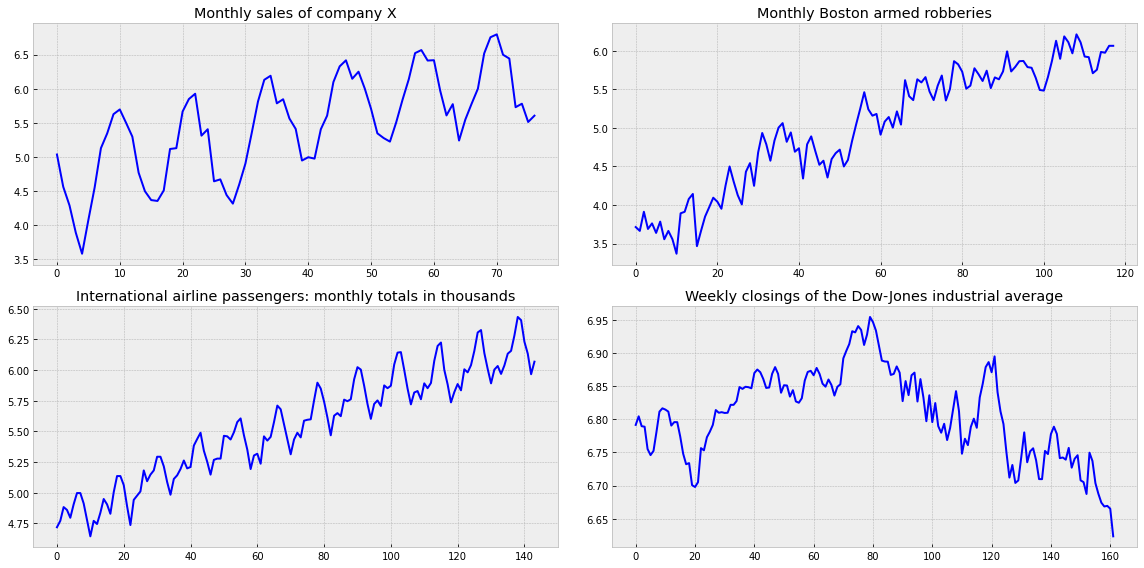

In [182]:
series_boxcox = {}
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (2, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)        
        ts_ax = plt.subplot2grid(layout, (y, x))
        series = pd.Series(boxcox(all_series[key], 0))
        series.plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        series_boxcox[key] = boxcox(all_series[key], 0)
    plt.tight_layout()

In [168]:
# Повторим тест
test_series(series_boxcox)

Results of Dickey-Fuller Test:
1   Monthly sales of company X False
Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64
_________________________
Results of Dickey-Fuller Test:
2   Monthly Boston armed robberies False
Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64
_________________________
Results of Dickey-Fuller Test:
3   International airline passengers: monthly totals in thousands False
Results of Dickey-Fuller Test:
T

Результат:  нормальзация дисперсии улучшила данные тест. Но тест Дикки-Фулера не позволяет отвергнуть 0 гипотезу на для одного из оставшихся рядов

# Уберем стренд. Дифференцироваие



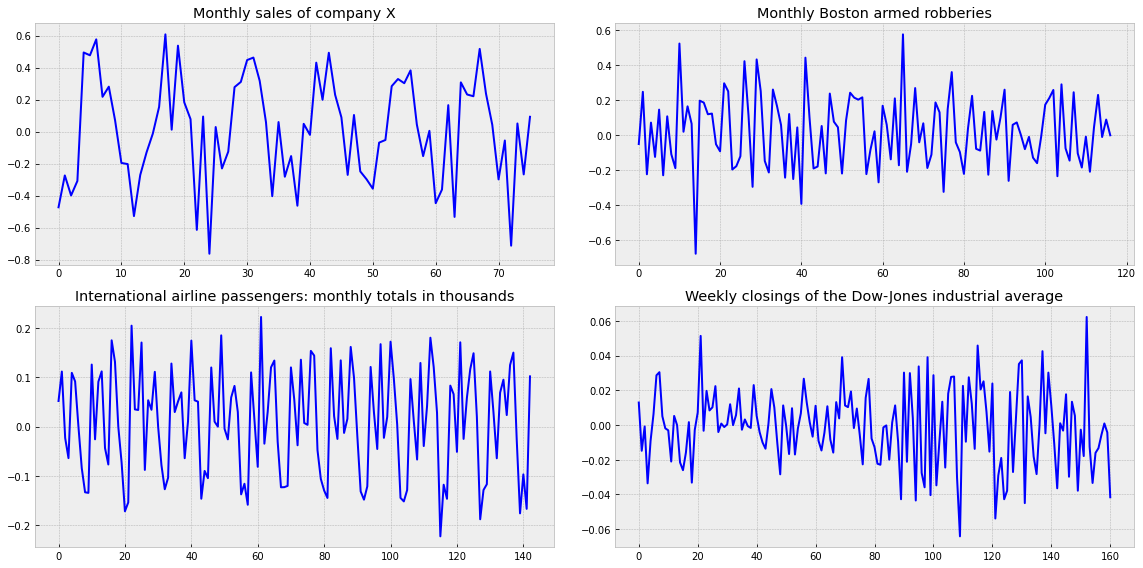

In [220]:
series_diff = {}
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (2, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)        
        ts_ax = plt.subplot2grid(layout, (y, x))
        step = 1
        series = series_boxcox[key][step:]-series_boxcox[key][:-step]
        series_diff[key]=series
        pd.Series(series).plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
    plt.tight_layout()


In [221]:
# Повторим тест
test_series(series_diff)

Results of Dickey-Fuller Test:
1   Monthly sales of company X True
Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64
_________________________
Results of Dickey-Fuller Test:
2   Monthly Boston armed robberies True
Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64
_________________________
Results of Dickey-Fuller Test:
3   International airline passengers: monthly totals in thousands False
Results of Dickey-Fu

## Результат: отвергаем нулевую гипотезу о нестационарности для всех рядов кроме 

Weekly closings of the Dow-Jones industrial average

In [229]:
# добавляем стационарные ряды в словарь
for key in series_diff.keys():
  if key !='International airline passengers: monthly totals in thousands':
    all_stationarity[key] = series_diff[key]

Осталось разобраться с рядом  International airline passengers: monthly totals in thousands. Попробуем убрать сезонность



In [235]:
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    return new_series

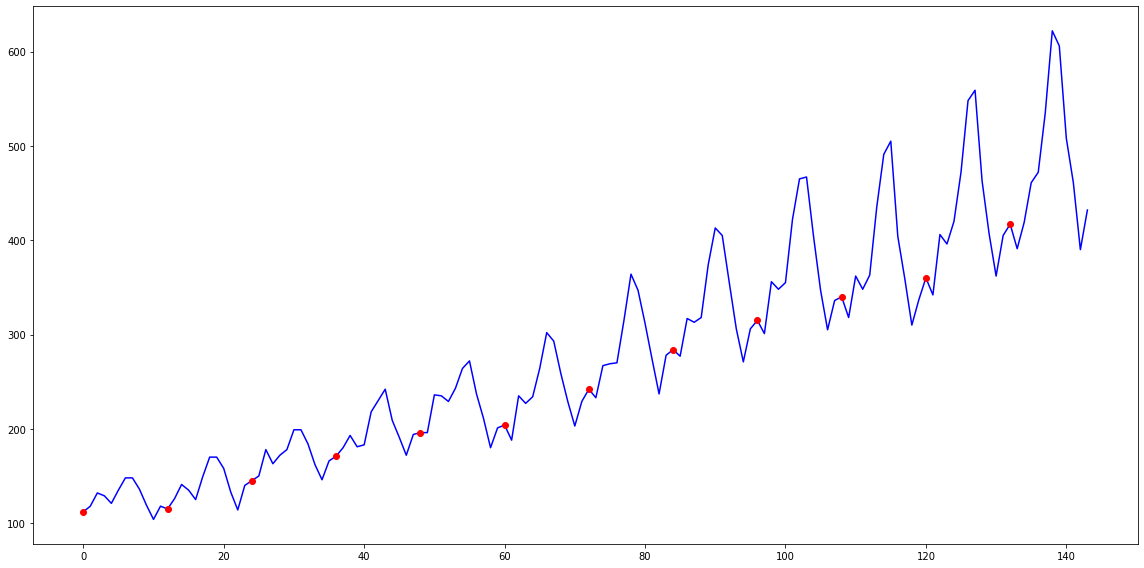

In [245]:
plt.figure(figsize=(16, 8))
key = 'International airline passengers: monthly totals in thousands'
all_series[key].plot( color='blue')
plot_ts_and_points(pd.Series(all_series[key]),0,12).plot( style='ro')
ts_ax.set_title(key)
plt.tight_layout()

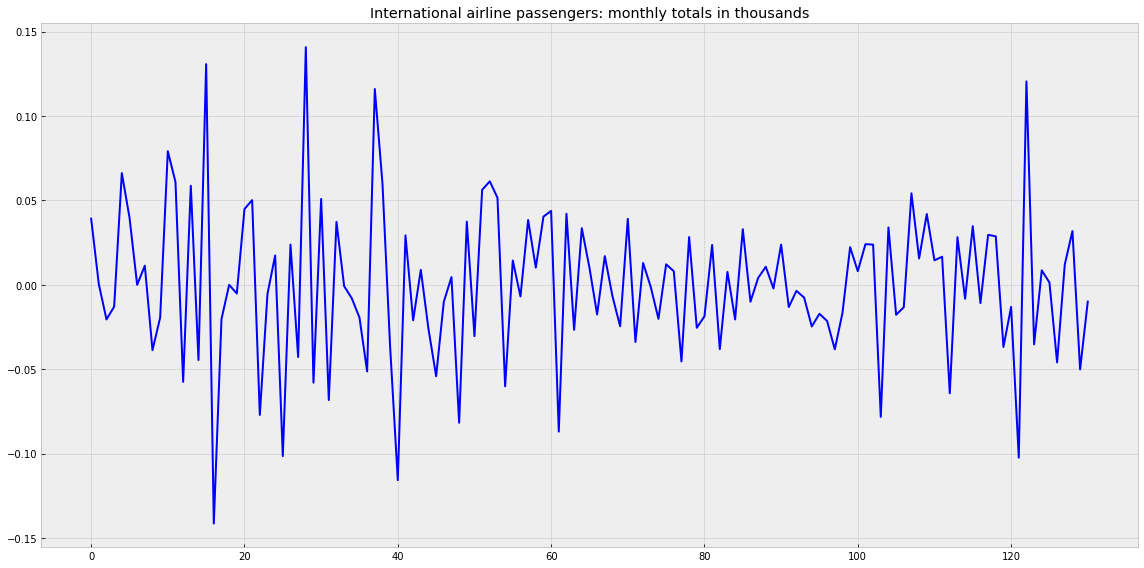

In [255]:
series_cycle = {}
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (1, 1)
    ts_ax = plt.subplot2grid(layout, (0, 0))
    step = 12
    series = series_diff[key][step:]-series_diff[key][:-step]
    series_cycle[key] = series
    pd.Series(series).plot(ax=ts_ax, color='blue')
    ts_ax.set_title(key)
    plt.tight_layout()

In [256]:
test_series(series_cycle)

Results of Dickey-Fuller Test:
1   International airline passengers: monthly totals in thousands True
Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64
_________________________


In [ ]:
series_cycle

# Результат: 
последний ряд можно считать стационарным, т.к. 0 гипотеза о нестационарности опровергнута

In [ ]:
# Добавляем последний ряд в словарь со стационарными рядами
key = series_cycle.keys
all_stationarity[key]

In [265]:
for i in series_cycle.keys():
  all_stationarity[i] = series_cycle[i]

# Теперь все ряды стационарные. Можем на них посмотреть:

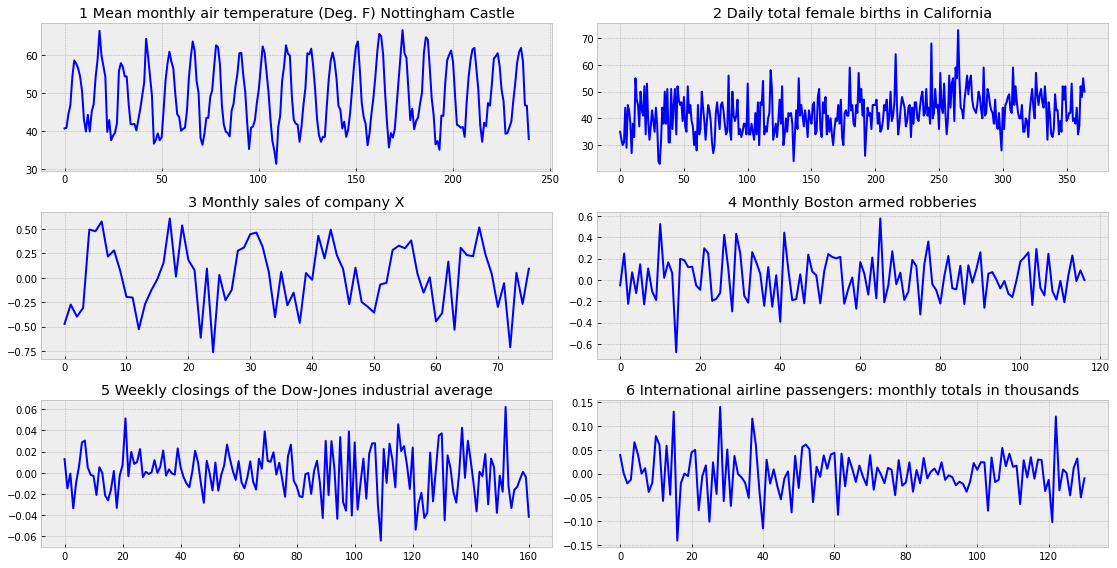

In [267]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_stationarity.keys()):
        x = i % 2
        y = int((i - x) / 2)        
        ts_ax = plt.subplot2grid(layout, (y, x))
        pd.Series(all_stationarity[key]).plot(ax=ts_ax, color='blue')
        ts_ax.set_title(str(i+1)+' '+key)
    plt.tight_layout()
